## Logistic Regression

It is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value to that particular class. Otherwise, if the probability is less than 50%, it assigns the value to the other class.<br>
Therefore, we can say that logistic regression acts as binary classifier.

Why do we use sigmoid function? <br>
1. its range is bounded b/w 0 and 1.Thus it's useful in calulationg the probability for the logistic function.
2. its derivative is easy to calulate than other functions which is useful during grdient descent calulations.
3. It is simple way of introducing non-linearity to the model.

#### Advantages of Logistic Regression
- it is very simple and easy to implement.
- The output is more informative than other classification algorithms.
- It expresses the relationship between independent and denpendent varibles.
- Very effective with linearly separable data.

#### Disadvantages of Logistic Regression
- Not effective with data which are not linerly separable.
- Not as pwerful as other classification models.
- Multiclass classifications are much easier to do with other algorithm than logistic regression
- It can only predict categorical outcomes.

In [2]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("h1n1_vaccine_prediction.csv") # Reading the Data
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.age_bracket

0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_bracket, Length: 26707, dtype: object

In [5]:
data.shape

(26707, 34)

In [6]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

## Exploratory Data analysis

In [8]:
v = data['h1n1_vaccine'].value_counts()
v

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [9]:
# Let's create a Pie-Chart to graphically represent the class distribution

import plotly.graph_objects as go

labels = ['No', 'Yes']


fig = go.Figure(data=[go.Pie(labels=labels,values=v, pull=[0, 0.05])])
fig.show()

### based on hypothesis sex ,material status,race,housing status,income level,no of aduls,no,of children are not important features 

In [10]:
## lets check the string values
data_obj=data.select_dtypes(include=object)
data_obj

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [11]:
data_obj.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [12]:
## label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
    data[i]=le.fit_transform(data[i])

In [13]:
data.age_bracket

0        3
1        1
2        0
3        4
4        2
        ..
26702    4
26703    0
26704    3
26705    0
26706    4
Name: age_bracket, Length: 26707, dtype: int32

In [14]:
## Missing values treatment 
for i in data.columns:
    if (data[i].isnull().sum())>0:
         data[i].fillna(data[i].mode()[0],inplace=True)

 ### checking the hypothesis with chin square test

In [15]:
from sklearn.feature_selection import chi2

In [16]:
x1=data.drop('h1n1_vaccine',axis=1)
y1=data.h1n1_vaccine

In [17]:
f_score=chi2(x1,y1)
f_score

(array([1.27892347e+03, 2.01358892e+02, 1.11808117e+02, 4.11096977e+01,
        1.59504077e+01, 1.23284462e+02, 2.58568639e+01, 5.61483986e+00,
        8.64154522e+00, 4.30653783e+01, 3.30781019e+03, 8.92499456e+02,
        1.72886102e+02, 1.09342915e+02, 6.72405011e+02, 3.04643931e+00,
        4.95639893e+02, 1.91415123e+03, 1.15654361e+02, 2.43320341e+02,
        1.22231992e+03, 2.01581768e+00, 4.37694949e+01, 1.24151591e+01,
        1.49313640e+01, 6.77656778e+00, 5.19724564e+00, 4.50617033e+01,
        2.79256058e+01, 1.27635738e+01, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([4.30008095e-280, 1.05510630e-045, 3.93620890e-026, 1.43920477e-010,
        6.50237709e-005, 1.20823440e-028, 3.67694855e-007, 1.78090085e-002,
        3.28582623e-003, 5.29408499e-011, 0.00000000e+000, 4.19137320e-196,
        1.73317808e-039, 1.36504702e-025, 2.99632034e-148, 8.09143610e-002,
        8.44597327e-110, 0.00000000e+000, 5.65791678e-027, 7.42579815e-055,
        8.60189894

In [18]:
p_values=pd.Series(f_score[1],index=x1.columns)

In [19]:
irr_cols=[]
for x in p_values.index:
    if p_values[x]<=0.05:
        print(x,' :- Reject the null hypothesis')
    else:
        print(x,' :- Accept the null hypothesis')
        irr_cols.append(x)
         
        

unique_id  :- Reject the null hypothesis
h1n1_worry  :- Reject the null hypothesis
h1n1_awareness  :- Reject the null hypothesis
antiviral_medication  :- Reject the null hypothesis
contact_avoidance  :- Reject the null hypothesis
bought_face_mask  :- Reject the null hypothesis
wash_hands_frequently  :- Reject the null hypothesis
avoid_large_gatherings  :- Reject the null hypothesis
reduced_outside_home_cont  :- Reject the null hypothesis
avoid_touch_face  :- Reject the null hypothesis
dr_recc_h1n1_vacc  :- Reject the null hypothesis
dr_recc_seasonal_vacc  :- Reject the null hypothesis
chronic_medic_condition  :- Reject the null hypothesis
cont_child_undr_6_mnths  :- Reject the null hypothesis
is_health_worker  :- Reject the null hypothesis
has_health_insur  :- Accept the null hypothesis
is_h1n1_vacc_effective  :- Reject the null hypothesis
is_h1n1_risky  :- Reject the null hypothesis
sick_from_h1n1_vacc  :- Reject the null hypothesis
is_seas_vacc_effective  :- Reject the null hypothesi

In [20]:
data.drop(irr_cols,axis=1,inplace=True)

In [21]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_risky,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,3,1,3,0,2,1,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,1,0,3,1,2,1,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,2,3,1,0,1,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,4.0,4,0,3,0,2,1,1,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,2,3,3,0,0,0,0,0,0


### Analysing the data

<Axes: xlabel='wash_hands_frequently', ylabel='count'>

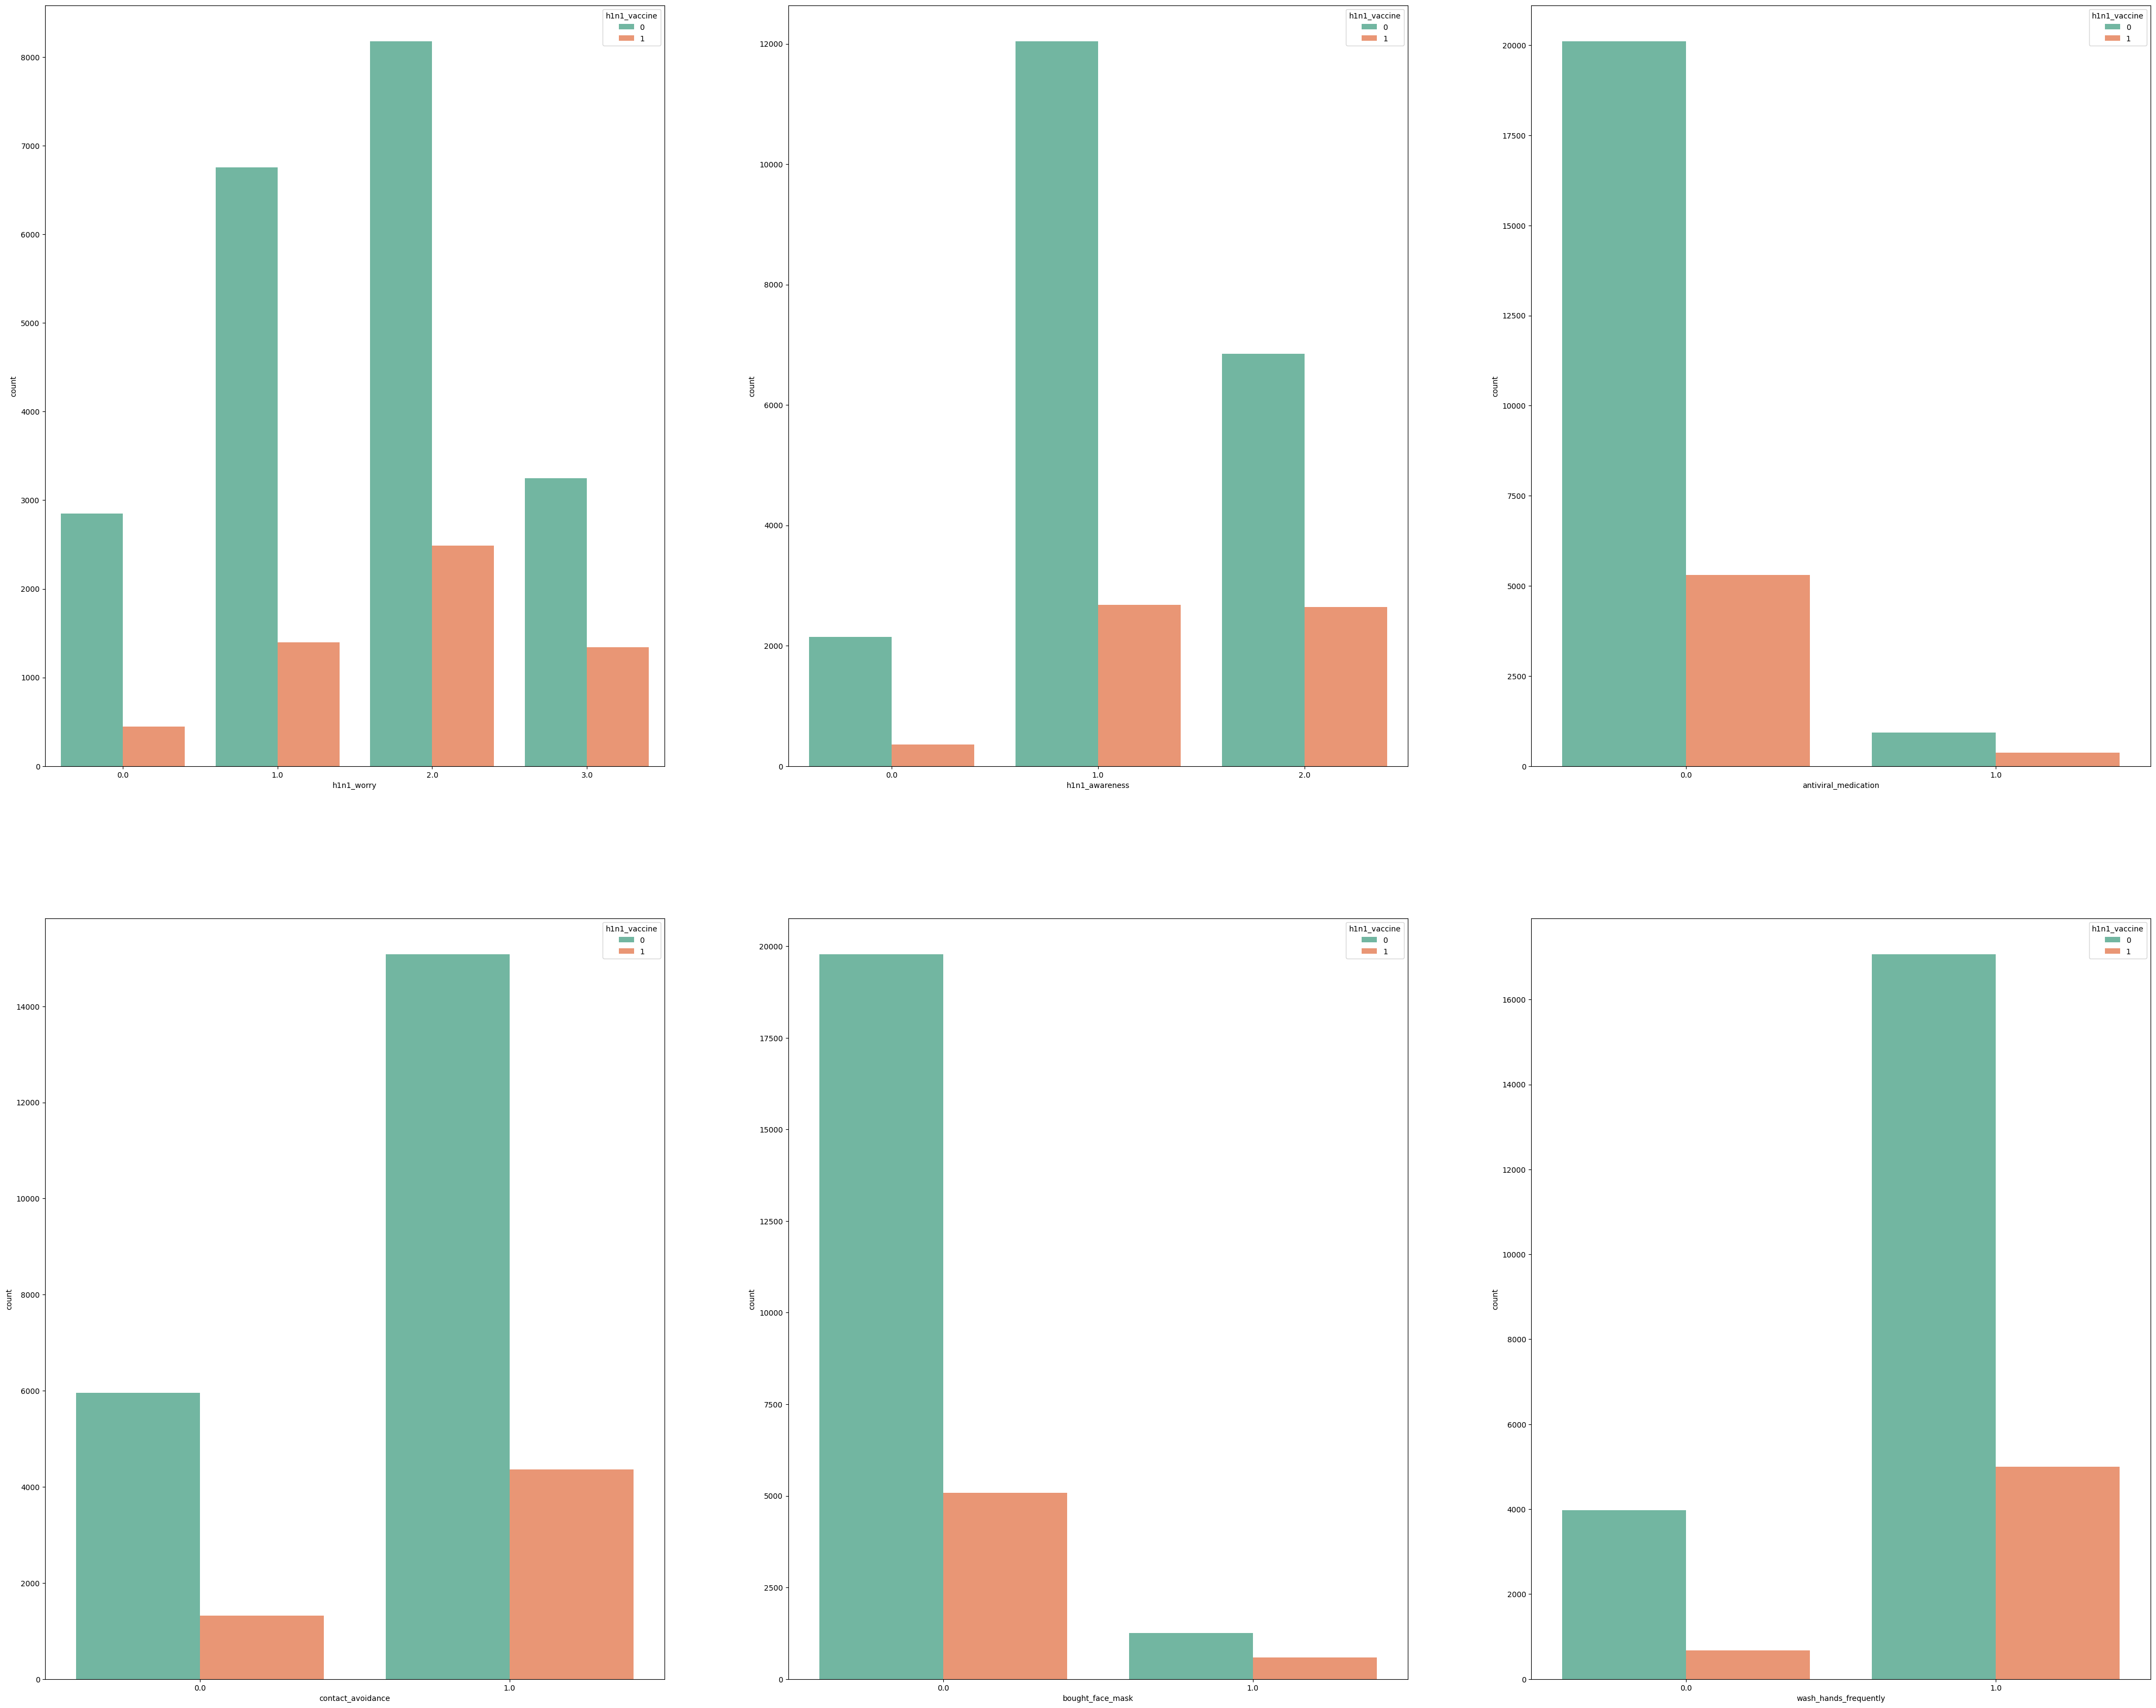

In [22]:
fig,ax=plt.subplots(2,3,figsize=(50,40))
sns.countplot(x='h1n1_worry', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[0][0])
sns.countplot(x='h1n1_awareness', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[0][1])
sns.countplot(x='antiviral_medication', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[0][2])
sns.countplot(x='contact_avoidance', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[1][0])
sns.countplot(x='bought_face_mask', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[1][1])
sns.countplot(x='wash_hands_frequently', hue='h1n1_vaccine', data=data, palette='Set2',ax=ax[1][2])

<Axes: xlabel='contact_avoidance', ylabel='count'>

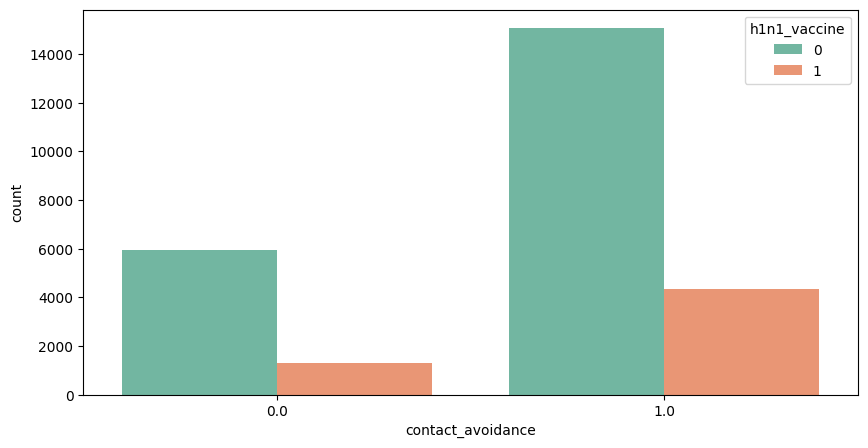

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='contact_avoidance', hue='h1n1_vaccine', data=data, palette='Set2')

**In the above graph we can observed that in 0.0(not avoid contact_avoidance) there are 6000 people in which 1000 people taked vaccine and 6000 not**

In [24]:
X = data.drop(columns = ['h1n1_vaccine'])
y = data['h1n1_vaccine']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state = 355)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21365, 28), (5342, 28), (21365,), (5342,))

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [29]:
# Making a Prediction
y_pred = log_reg.predict(x_test)

In [30]:
y_test

25128    0
13827    1
24114    0
9686     0
194      0
        ..
5084     0
11418    0
21669    1
11376    0
17035    0
Name: h1n1_vaccine, Length: 5342, dtype: int64

In [31]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8208536128790715

In [32]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6389088220254974

In [33]:
x_test.shape

(5342, 28)

In [34]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[4024,  726],
       [ 231,  361]], dtype=int64)

In [35]:
from sklearn.metrics import recall_score
precision_score(y_test, y_pred)

0.6097972972972973

In [36]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test,y_pred)

In [37]:
print('F1_Score:',f1_score)

F1_Score: 0.43001786777843953


In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

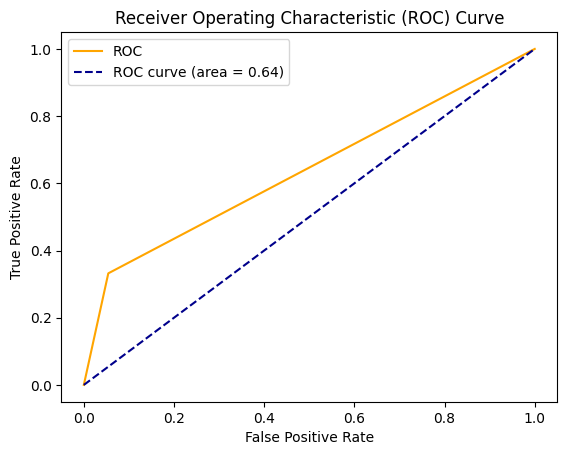

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Text(120.72222222222221, 0.5, 'Truth')

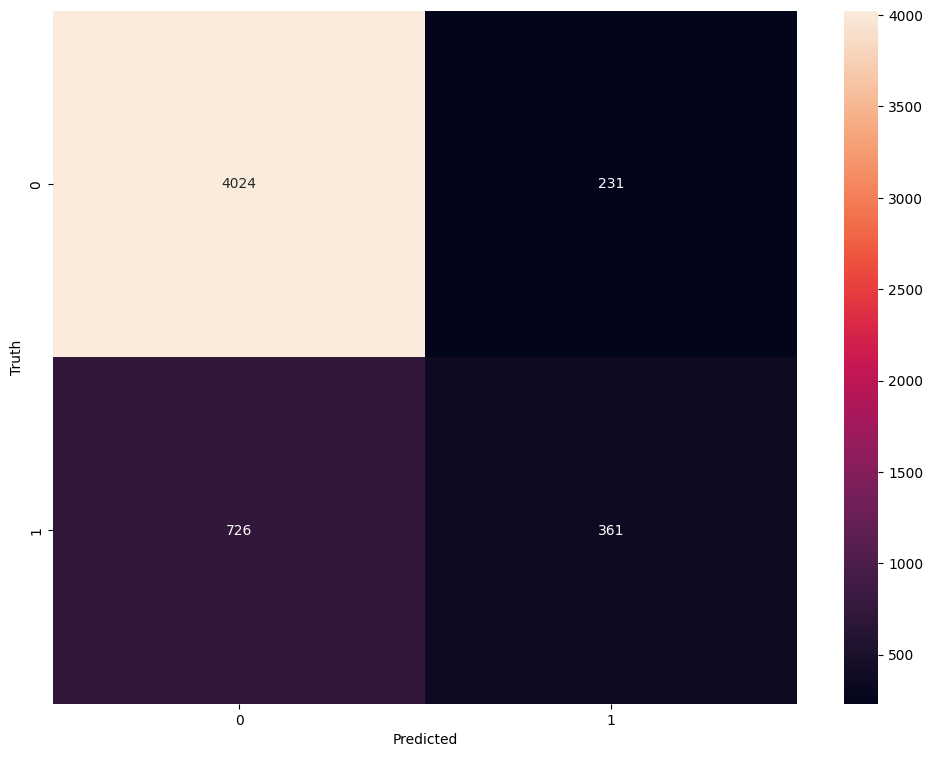

In [40]:
#confunctiony_ Matrix
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## blancing the data using SMOTE

In [41]:
#blancing the data using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=23)
X_sm,y_sm=sm.fit_resample(X,y)

In [42]:
y.value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [43]:
y_sm.value_counts()

h1n1_vaccine
0    21033
1    21033
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size= 0.20, random_state = 42)


In [45]:
#for Balancing the training data
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)


LogisticRegression()

In [46]:
# Making a Prediction
y_pred = log_reg.predict(x_test)

In [47]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score

accuracy = accuracy_score(y_test, y_pred)*100
roc_auc_score = roc_auc_score(y_test, y_pred)*100
precision_score = precision_score(y_test, y_pred)*100
f1score = f1_score(y_test, y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"precision_score = {precision_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 77.2284
roc_auc_score = 77.2577
precision_score = 75.7512
F1 Score = 77.2447


In [48]:
from sklearn.metrics import log_loss
print('logloss error :',log_loss(y_test,y_pred))

logloss error : 8.207706191294088
